In [21]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [56]:
solar_radiation = pd.read_csv("dataset/SolarPrediction.csv", usecols=["UNIXTime", "Radiation"])

In [57]:
solar_radiation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UNIXTime   32686 non-null  int64  
 1   Radiation  32686 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 510.8 KB


In [58]:
solar_radiation["Timestamp"] = pd.to_datetime(solar_radiation["UNIXTime"], unit='s', utc=True).dt.tz_convert('Pacific/Tahiti')

In [59]:
solar_radiation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype                         
---  ------     --------------  -----                         
 0   UNIXTime   32686 non-null  int64                         
 1   Radiation  32686 non-null  float64                       
 2   Timestamp  32686 non-null  datetime64[ns, Pacific/Tahiti]
dtypes: datetime64[ns, Pacific/Tahiti](1), float64(1), int64(1)
memory usage: 766.2 KB


In [60]:
solar_radiation.head()

,UNIXTime,Radiation,Timestamp
0,1475229326,1.21,2016-09-29 23:55:26-10:00
1,1475229023,1.21,2016-09-29 23:50:23-10:00
2,1475228726,1.23,2016-09-29 23:45:26-10:00
3,1475228421,1.21,2016-09-29 23:40:21-10:00
4,1475228124,1.17,2016-09-29 23:35:24-10:00


In [61]:
solar_radition = solar_radiation.drop(columns=['UNIXTime'], inplace=True)

In [62]:
solar_radiation

,Radiation,Timestamp
0,1.21,2016-09-29 23:55:26-10:00
1,1.21,2016-09-29 23:50:23-10:00
2,1.23,2016-09-29 23:45:26-10:00
3,1.21,2016-09-29 23:40:21-10:00
4,1.17,2016-09-29 23:35:24-10:00
...,...,...
32681,1.22,2016-12-01 00:20:04-10:00
32682,1.17,2016-12-01 00:15:01-10:00
32683,1.20,2016-12-01 00:10:01-10:00
32684,1.23,2016-12-01 00:05:02-10:00


In [63]:
solar_radiation.set_index('Timestamp', inplace=True)

In [64]:
solar_radiation

,Radiation
Timestamp,
2016-09-29 23:55:26-10:00,1.21
2016-09-29 23:50:23-10:00,1.21
2016-09-29 23:45:26-10:00,1.23
2016-09-29 23:40:21-10:00,1.21
2016-09-29 23:35:24-10:00,1.17
...,...
2016-12-01 00:20:04-10:00,1.22
2016-12-01 00:15:01-10:00,1.17
2016-12-01 00:10:01-10:00,1.20


In [66]:
solar_radiation.describe()

,Radiation
count,32686.000000
mean,207.124697
std,315.916387
min,1.110000
25%,1.230000
50%,2.660000
75%,354.235000
max,1601.260000


(array([2.0898e+04, 1.6730e+03, 1.4880e+03, 1.4830e+03, 1.2170e+03,
        1.0850e+03, 1.0690e+03, 1.3830e+03, 1.3950e+03, 8.1000e+02,
        1.2300e+02, 4.5000e+01, 1.2000e+01, 4.0000e+00, 1.0000e+00]),
 array([1.11000000e+00, 1.07786667e+02, 2.14463333e+02, 3.21140000e+02,
        4.27816667e+02, 5.34493333e+02, 6.41170000e+02, 7.47846667e+02,
        8.54523333e+02, 9.61200000e+02, 1.06787667e+03, 1.17455333e+03,
        1.28123000e+03, 1.38790667e+03, 1.49458333e+03, 1.60126000e+03]),
 <BarContainer object of 15 artists>)

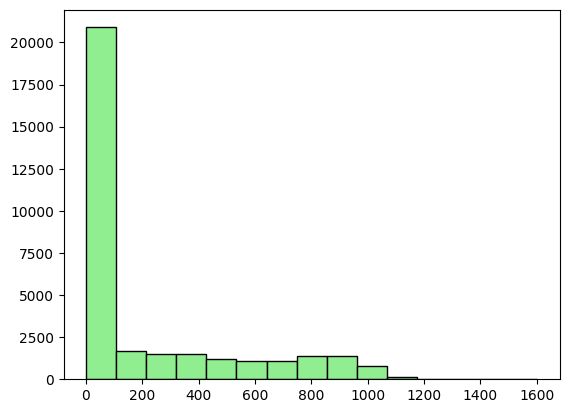

In [67]:
plt.hist(solar_radiation, color='lightgreen', ec='black', bins=15)

<Axes: xlabel='Timestamp'>

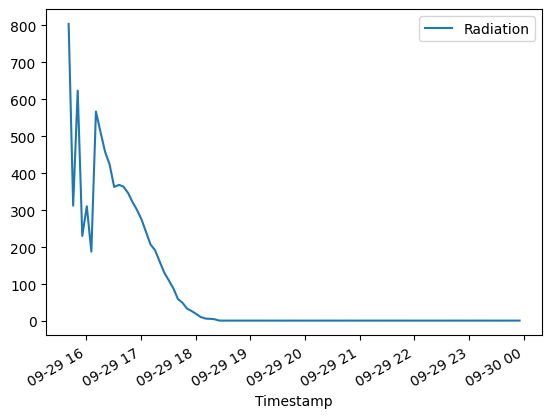

In [69]:
solar_radiation[:100].plot()